<a href="https://colab.research.google.com/github/fahmidjobbi/Colab_DATA/blob/main/Project0_FL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
df = pd.read_csv('/content/sample_data.csv')

In [ ]:
df

,row_id,ad_id,ad_city,city,township,city_civil_parish,district,street,rooms,area,...,price_sqm,price,price_unit,location,latitude,longitude,ad_date,scrap_date,rent_sell,flat_house
0,95702,tr_54321193,rezekne-and-reg,Rezekne and reg.,NaN,Rezekne,NaN,Upes iela 39,3,61.0,...,655.74,40000,total,rezekne-and-reg,56.557312,26.921105,2.024010e+11,2.024010e+11,sell,flat
1,58016,tr_53337774,riga,Riga,NaN,NaN,Kipsala,Enkura 2,4,180.0,...,NaN,2200,mon,riga,56.957985,24.080378,2.023060e+11,2.023060e+11,hand_over,house
2,94655,tr_53417312,jurmala,Yurmala,NaN,NaN,Melluži,Daugavas 24,5,169.0,...,NaN,326000,total,yurmala,56.955170,23.729854,2.024010e+11,2.024010e+11,sell,house
3,100962,tr_54408460,bauska-and-reg,Bauska and reg.,NaN,Bauska,NaN,Salātu 18,1,30.0,...,5.33,160,mon,bauska-and-reg,56.408396,24.201588,2.024020e+11,2.024020e+11,hand_over,flat
4,42303,tr_51802784,riga,Riga,NaN,NaN,Agenskalns,Ranka d. 34,4,110.0,...,3572.73,393000,total,riga,56.943091,24.055867,2.023080e+11,2.023090e+11,sell,flat
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,74176,tr_53494283,riga-region,Riga district,Baltezers,Ādažu nov.,NaN,Mežrozīšu 6,7,310.0,...,NaN,580000,total,riga-district,57.038438,24.289184,2.023090e+11,2.023100e+11,sell,house
4996,100293,tr_54367333,bauska-and-reg,Bauska and reg.,Uzvara,Gailīšu pag.,NaN,Uzvaras 12,3,76.0,...,302.63,23000,total,bauska-and-reg,56.321864,24.255993,2.024020e+11,2.024020e+11,sell,flat
4997,27296,tr_52963853,rezekne-and-reg,Rezekne and reg.,NaN,Rezekne,NaN,Maskavas 8,3,60.0,...,583.33,35000,total,rezekne-and-reg,56.452579,27.069657,2.023050e+11,2.023060e+11,sell,flat
4998,127592,tr_55091756,riga-region,Riga district,Jāņupe,Olaines pag.,NaN,Jāņupietis 150,2,40.0,...,NaN,22000,total,riga-district,56.691452,24.108636,2.024060e+11,2.024060e+11,sell,house


In [ ]:
import pandas as pd
import plotly.express as px

# Function to generate a map using OpenStreetMap (no token required)
def generate_district_price_map(data):
    """
    Function to visualize average price per district on a map using Plotly with OpenStreetMap.

    Parameters:
        data (pd.DataFrame): The dataset containing latitude, longitude, district, and price information.
    """

    # Calculate the average price per district
    avg_price_per_district = data.groupby('district').agg({
        'price': 'mean',
        'latitude': 'mean',
        'longitude': 'mean'
    }).reset_index()

    # Create the map using OpenStreetMap (OSM)
    fig = px.scatter_mapbox(
        avg_price_per_district,
        lat="latitude",
        lon="longitude",
        size="price",
        color="price",
        hover_name="district",
        hover_data=["price"],
        color_continuous_scale="Viridis",
        size_max=15,
        zoom=10,
        mapbox_style="open-street-map"  # This uses OpenStreetMap, no token needed
    )

    # Display the map
    fig.show()

# Example usage (assuming 'df' is your DataFrame)
generate_district_price_map(df)


In [ ]:
import pandas as pd

# Load the dataset
file_path = '/content/sample_data.csv'  # Update this path as needed
data = pd.read_csv(file_path)

# Display the initial data
print("Initial Data:")
print(data.head())

# Check for missing values
missing_values = data.isnull().sum()
print("\nMissing Values:")
print(missing_values[missing_values > 0])

# Drop rows with missing values in crucial columns (like 'city', 'district', 'price')
data_cleaned = data.dropna(subset=['city', 'district', 'price'])

# Check for duplicates
duplicates = data_cleaned.duplicated().sum()
print(f"\nNumber of duplicate entries: {duplicates}")

# Remove duplicates if any
data_cleaned = data_cleaned.drop_duplicates()

# Ensure data types are appropriate
data_cleaned['price'] = pd.to_numeric(data_cleaned['price'], errors='coerce')
data_cleaned['latitude'] = pd.to_numeric(data_cleaned['latitude'], errors='coerce')
data_cleaned['longitude'] = pd.to_numeric(data_cleaned['longitude'], errors='coerce')

# Display cleaned data
print("\nCleaned Data:")
print(data_cleaned.head())
print(f"\nCleaned Data Shape: {data_cleaned.shape}")

# Check data types
print("\nData Types:")
print(data_cleaned.dtypes)


Initial Data:
   row_id        ad_id          ad_city              city township  \
0   95702  tr_54321193  rezekne-and-reg  Rezekne and reg.      NaN   
1   58016  tr_53337774             riga              Riga      NaN   
2   94655  tr_53417312          jurmala           Yurmala      NaN   
3  100962  tr_54408460   bauska-and-reg   Bauska and reg.      NaN   
4   42303  tr_51802784             riga              Riga      NaN   

  city_civil_parish    district        street rooms   area  ...  price_sqm  \
0           Rezekne         NaN  Upes iela 39     3   61.0  ...     655.74   
1               NaN     Kipsala      Enkura 2     4  180.0  ...        NaN   
2               NaN     Melluži   Daugavas 24     5  169.0  ...        NaN   
3            Bauska         NaN     Salātu 18     1   30.0  ...       5.33   
4               NaN  Agenskalns   Ranka d. 34     4  110.0  ...    3572.73   

    price  price_unit         location   latitude  longitude       ad_date  \
0   40000       to

        name  avg_price
0    Alūksne        NaN
1     Līvāni        NaN
2    Gulbene        NaN
3  Ventspils        NaN
4      Valka        NaN


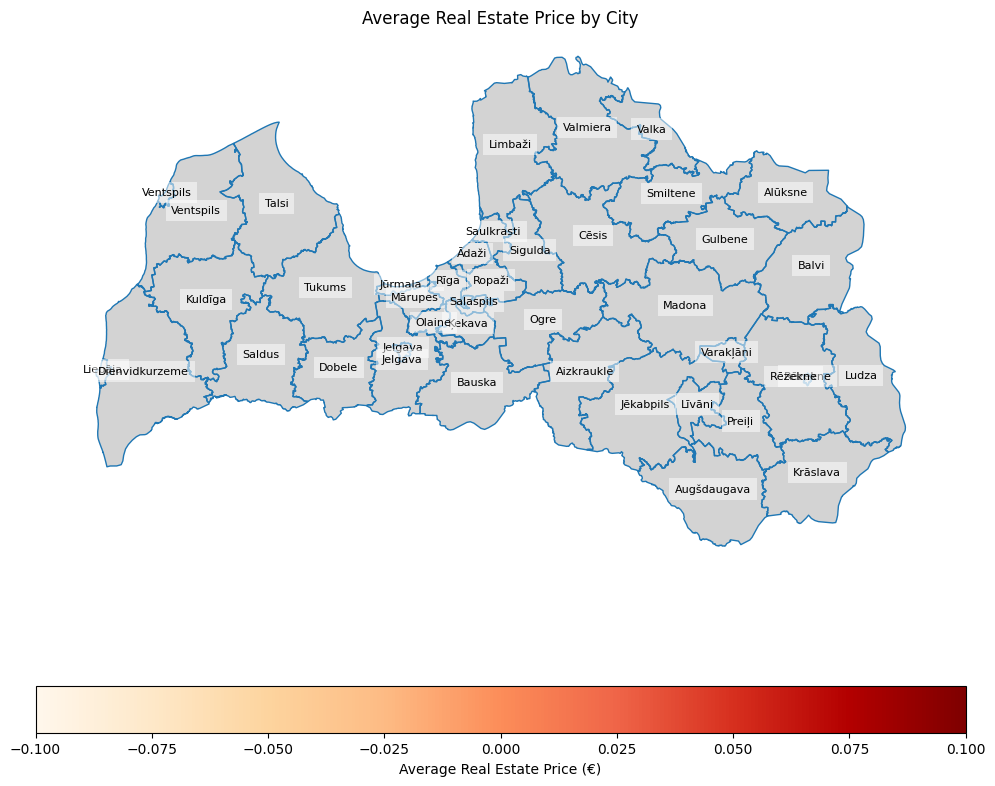

In [ ]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

# Load the dataset
file_path = '/content/sample_data.csv'  # Update this path as needed
data = pd.read_csv(file_path)

# Clean the dataset
data_cleaned = data.dropna(subset=['city', 'district', 'price', 'latitude', 'longitude'])
data_cleaned = data_cleaned.drop_duplicates()
data_cleaned['price'] = pd.to_numeric(data_cleaned['price'], errors='coerce')

# Calculate the average price per city
avg_price_city = data_cleaned.groupby('city')['price'].mean().reset_index()
avg_price_city.columns = ['city', 'avg_price']

# Create a mapping for abbreviations
abbreviation_mapping = {
    'Alūksnes novads': 'Alūksne',
    'Līvānu novads': 'Līvāni',
    'Gulbenes novads': 'Gulbene',
    'Ventspils novads': 'Ventspils',
    'Valkas novads': 'Valka',
    'Salaspils novads': 'Salaspils',
    'Jelgavas pilsēta': 'Jelgava',
    'Rēzeknes pilsēta': 'Rēzekne',
    'Jūrmalas pilsēta': 'Jūrmala',
    'Ventspils pilsēta': 'Ventspils',
    'Rīgas pilsēta': 'Rīga',
    'Liepājas pilsēta': 'Liepāja',
    'Dienvidkurzemes novads': 'Dienvidkurzeme',
    'Kuldīgas novads': 'Kuldīga',
    'Saldus novads': 'Saldus',
    'Talsu novads': 'Talsi',
    'Tukuma novads': 'Tukums',
    'Dobeles novads': 'Dobele',
    'Jelgavas novads': 'Jelgava',
    'Mārupes novads': 'Mārupes',
    'Bauskas novads': 'Bauska',
    'Ogres novads': 'Ogre',
    'Aizkraukles novads': 'Aizkraukle',
    'Jēkabpils novads': 'Jēkabpils',
    'Ludzas novads': 'Ludza',
    'Rēzeknes novads': 'Rēzekne',
    'Balvu novads': 'Balvi',
    'Madonas novads': 'Madona',
    'Smiltenes novads': 'Smiltene',
    'Cēsu novads': 'Cēsis',
    'Valmieras novads': 'Valmiera',
    'Ādažu novads': 'Ādaži',
    'Ropažu novads': 'Ropaži',
    'Siguldas novads': 'Sigulda',
    'Preiļu novads': 'Preiļi',
    'Krāslavas novads': 'Krāslava',
    'Ķekavas novads': 'Ķekava',
    'Olaines novads': 'Olaine',
    'Saulkrastu novads': 'Saulkrasti',
    'Limbažu novads': 'Limbaži',
    'Augšdaugavas novads': 'Augšdaugava',
    'Varakļānu novads': 'Varakļāni'
}


# Load GeoJSON data
geojson_path = '/content/lv.json'  # Update this path as needed
gdf = gpd.read_file(geojson_path)

# Replace long names with abbreviations
gdf['name'] = gdf['name'].replace(abbreviation_mapping)

# Merge the average prices with geographical data
gdf = gdf.merge(avg_price_city, left_on='name', right_on='city', how='left')

# Check the merged DataFrame
print(gdf[['name', 'avg_price']].head())

# Re-project the geometries to a projected CRS (for example, UTM)
gdf = gdf.to_crs(epsg=3857)

# Calculate centroids in the projected CRS
gdf['centroid'] = gdf.geometry.centroid

# Plotting
fig, ax = plt.subplots(1, 1, figsize=(12, 10))
gdf.boundary.plot(ax=ax, linewidth=1)
gdf.plot(column='avg_price', ax=ax, legend=True,
         legend_kwds={'label': "Average Real Estate Price (€)",
                      'orientation': "horizontal"},
         cmap='OrRd', missing_kwds={"color": "lightgrey", "label": "No data"})

# Annotate city names and average prices on the map
for x, y, label, price in zip(gdf.centroid.x, gdf.centroid.y, gdf['name'], gdf['avg_price']):
    ax.annotate(f"{label}<br>€{price:.2f}" if pd.notna(price) else label,
                xy=(x, y),
                horizontalalignment='center',
                fontsize=8,
                color='black',
                bbox=dict(facecolor='white', alpha=0.5, edgecolor='none'))

plt.title('Average Real Estate Price by City')
plt.axis('off')
plt.show()


In [ ]:
import pandas as pd
import plotly.express as px

# Load your dataset (adjust the path as necessary)
file_path = '/content/sample_data.csv'  # Update this path as needed
data = pd.read_csv(file_path)

# Clean the dataset
data_cleaned = data.dropna(subset=['district', 'price', 'latitude', 'longitude'])
data_cleaned = data_cleaned.drop_duplicates()

# Calculate the average price per district
avg_price_per_district = data_cleaned.groupby('district').agg({
    'price': 'mean',
    'latitude': 'mean',
    'longitude': 'mean'
}).reset_index()

# Function to generate a map using OpenStreetMap (no token required)
def generate_district_price_map(data):
    """
    Function to visualize average price per district on a map using Plotly with OpenStreetMap.

    Parameters:
        data (pd.DataFrame): The dataset containing latitude, longitude, district, and price information.
    """
    # Create the map using OpenStreetMap (OSM)
    fig = px.scatter_mapbox(
        data,
        lat="latitude",
        lon="longitude",
        size="price",
        color="price",
        hover_name="district",
        hover_data=["price"],
        color_continuous_scale=px.colors.sequential.Reds,  # Change to red gradient
        size_max=15,
        zoom=6,  # Adjust zoom level as needed
        mapbox_style="open-street-map"  # This uses OpenStreetMap, no token needed
    )

    # Display the map
    fig.show()

# Example usage
generate_district_price_map(avg_price_per_district)


In [ ]:
import pandas as pd
import plotly.express as px

# Load your dataset (adjust the path as necessary)
file_path = '/content/sample_data.csv'  # Update this path as needed
data = pd.read_csv(file_path)

# Clean the dataset
data_cleaned = data.dropna(subset=['district', 'price', 'latitude', 'longitude'])
data_cleaned = data_cleaned.drop_duplicates()

# Calculate the average price per district
avg_price_per_district = data_cleaned.groupby('district').agg({
    'price': 'mean',
    'latitude': 'mean',
    'longitude': 'mean'
}).reset_index()

# Function to generate a map using OpenStreetMap (no token required)
def generate_district_price_map(data):
    """
    Function to visualize average price per district on a map using Plotly with OpenStreetMap.

    Parameters:
        data (pd.DataFrame): The dataset containing latitude, longitude, district, and price information.
    """
    # Create the map using OpenStreetMap (OSM)
    fig = px.scatter_mapbox(
        data,
        lat="latitude",
        lon="longitude",
        size="price",
        color="price",
        hover_name="district",
        hover_data={"price": False},  # Disable default price display
        text=data['price'].apply(lambda x: f"${x:,.2f}"),  # Format price with dollar sign and commas
        color_continuous_scale=px.colors.sequential.Reds,  # Change to red gradient
        size_max=15,
        zoom=6,  # Adjust zoom level as needed
        mapbox_style="open-street-map"  # This uses OpenStreetMap, no token needed
    )

    # Adjust the layout to control text size and position
    fig.update_traces(textposition='top center', textfont=dict(size=10))  # Adjust text size here

    # Display the map
    fig.show()

# Example usage
generate_district_price_map(avg_price_per_district)


In [ ]:
import pandas as pd
import plotly.express as px

# Load your dataset (adjust the path as necessary)
file_path = '/content/sample_data.csv'  # Update this path as needed
data = pd.read_csv(file_path)

# Clean the dataset
data_cleaned = data.dropna(subset=['district', 'price', 'latitude', 'longitude'])
data_cleaned = data_cleaned.drop_duplicates()

# Calculate the average price per district
avg_price_per_district = data_cleaned.groupby('district').agg({
    'price': 'mean',
    'latitude': 'mean',
    'longitude': 'mean'
}).reset_index()

# Function to generate a map using OpenStreetMap (no token required)
def generate_district_price_map(data, output_file='district_price_map.html'):
    """
    Function to visualize average price per district on a map using Plotly with OpenStreetMap.
    Saves the map as an HTML file with custom Garamond font.

    Parameters:
        data (pd.DataFrame): The dataset containing latitude, longitude, district, and price information.
        output_file (str): The file path to save the map as an HTML file.
    """
    # Create the map using OpenStreetMap (OSM)
    fig = px.scatter_mapbox(
        data,
        lat="latitude",
        lon="longitude",
        size="price",
        color="price",
        hover_name="district",
        hover_data=["price"],
        color_continuous_scale=px.colors.sequential.Reds,  # Change to red gradient
        size_max=15,
        zoom=6,  # Adjust zoom level as needed
        mapbox_style="open-street-map"  # This uses OpenStreetMap, no token needed
    )

    # Customize layout to use Garamond font
    fig.update_layout(
        font=dict(family="Garamond, serif"),  # Set font to Garamond
        title="Average Price per District",
        title_font=dict(size=24),
    )

    # Save the map as an HTML file
    fig.write_html(output_file)

    print(f"Map saved as {output_file}")

# Example usage
generate_district_price_map(avg_price_per_district, 'district_price_map.html')


Map saved as district_price_map.html


     district      avg_price
0  Agenskalns  129803.253731
1  Aplokciems   18236.666667
2       Asari  198450.217391
3   Beberbeki   57775.000000
4       Bergi  258345.454545
        name  avg_price
0    Alūksne        NaN
1     Līvāni        NaN
2    Gulbene        NaN
3  Ventspils        NaN
4      Valka        NaN


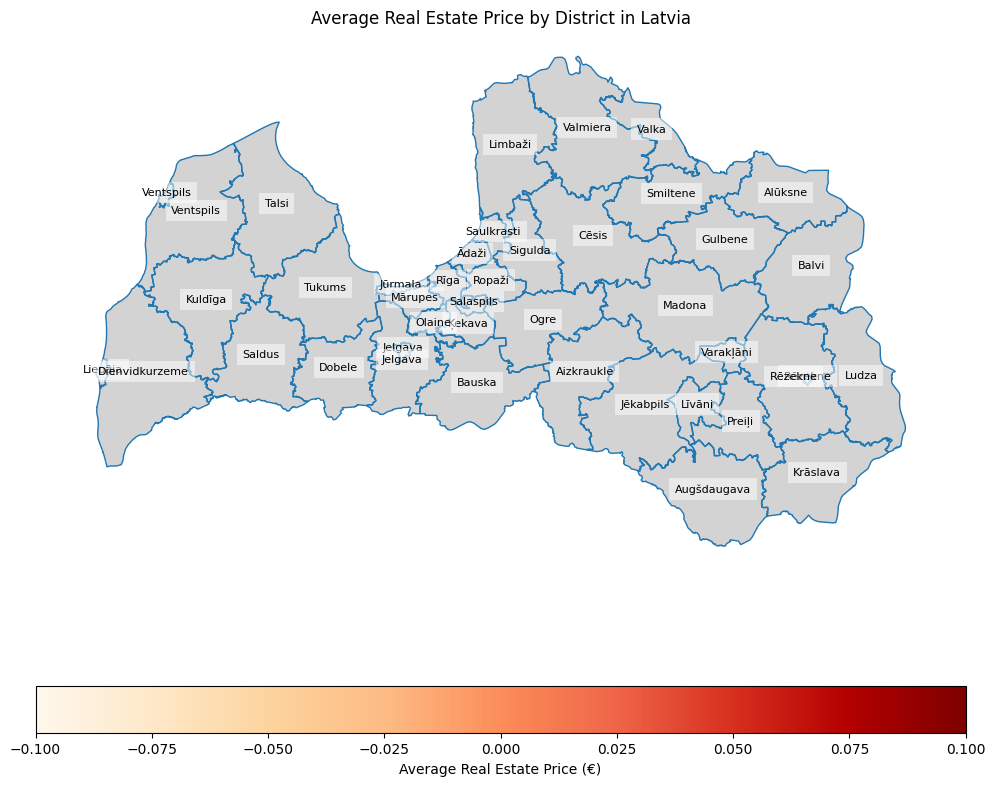

In [ ]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

# Load the dataset
file_path = '/content/sample_data.csv'  # Update this path as needed
data = pd.read_csv(file_path)

# Clean the dataset
data_cleaned = data.dropna(subset=['district', 'price', 'latitude', 'longitude'])
data_cleaned = data_cleaned.drop_duplicates()
data_cleaned['price'] = pd.to_numeric(data_cleaned['price'], errors='coerce')

# Calculate the average price per district
avg_price_district = data_cleaned.groupby('district')['price'].mean().reset_index()
avg_price_district.columns = ['district', 'avg_price']
print(avg_price_district.head())
# Create a mapping for abbreviations (if the names in the dataset differ from the GeoJSON)
# Create a mapping for abbreviations
abbreviation_mapping = {
    'Alūksnes novads': 'Alūksne',
    'Līvānu novads': 'Līvāni',
    'Gulbenes novads': 'Gulbene',
    'Ventspils novads': 'Ventspils',
    'Valkas novads': 'Valka',
    'Salaspils novads': 'Salaspils',
    'Jelgavas pilsēta': 'Jelgava',
    'Rēzeknes pilsēta': 'Rēzekne',
    'Jūrmalas pilsēta': 'Jūrmala',
    'Ventspils pilsēta': 'Ventspils',
    'Rīgas pilsēta': 'Rīga',
    'Liepājas pilsēta': 'Liepāja',
    'Dienvidkurzemes novads': 'Dienvidkurzeme',
    'Kuldīgas novads': 'Kuldīga',
    'Saldus novads': 'Saldus',
    'Talsu novads': 'Talsi',
    'Tukuma novads': 'Tukums',
    'Dobeles novads': 'Dobele',
    'Jelgavas novads': 'Jelgava',
    'Mārupes novads': 'Mārupes',
    'Bauskas novads': 'Bauska',
    'Ogres novads': 'Ogre',
    'Aizkraukles novads': 'Aizkraukle',
    'Jēkabpils novads': 'Jēkabpils',
    'Ludzas novads': 'Ludza',
    'Rēzeknes novads': 'Rēzekne',
    'Balvu novads': 'Balvi',
    'Madonas novads': 'Madona',
    'Smiltenes novads': 'Smiltene',
    'Cēsu novads': 'Cēsis',
    'Valmieras novads': 'Valmiera',
    'Ādažu novads': 'Ādaži',
    'Ropažu novads': 'Ropaži',
    'Siguldas novads': 'Sigulda',
    'Preiļu novads': 'Preiļi',
    'Krāslavas novads': 'Krāslava',
    'Ķekavas novads': 'Ķekava',
    'Olaines novads': 'Olaine',
    'Saulkrastu novads': 'Saulkrasti',
    'Limbažu novads': 'Limbaži',
    'Augšdaugavas novads': 'Augšdaugava',
    'Varakļānu novads': 'Varakļāni'
}

# Load GeoJSON data
geojson_path = '/content/lv.json'  # Update this path as needed
gdf = gpd.read_file(geojson_path)

# Replace long names with abbreviations in the GeoDataFrame
gdf['name'] = gdf['name'].replace(abbreviation_mapping)

# Merge the average prices with geographical data by district
gdf = gdf.merge(avg_price_district, left_on='name', right_on='district', how='left')

# Check the merged DataFrame to confirm the data merge
print(gdf[['name', 'avg_price']].head())

# Re-project the geometries to a projected CRS (for example, UTM)
gdf = gdf.to_crs(epsg=3857)

# Calculate centroids in the projected CRS for annotation placement
gdf['centroid'] = gdf.geometry.centroid

# Plotting the map
fig, ax = plt.subplots(1, 1, figsize=(12, 10))
gdf.boundary.plot(ax=ax, linewidth=1)
gdf.plot(column='avg_price', ax=ax, legend=True,
         legend_kwds={'label': "Average Real Estate Price (€)",
                      'orientation': "horizontal"},
         cmap='OrRd', missing_kwds={"color": "lightgrey", "label": "No data"})

# Annotate district names and average prices on the map
for x, y, label, price in zip(gdf.centroid.x, gdf.centroid.y, gdf['name'], gdf['avg_price']):
    ax.annotate(f"{label}\n€{price:.2f}" if pd.notna(price) else label,
                xy=(x, y),
                horizontalalignment='center',
                fontsize=8,
                color='black',
                bbox=dict(facecolor='white', alpha=0.5, edgecolor='none'))

plt.title('Average Real Estate Price by District in Latvia')
plt.axis('off')
plt.show()


In [ ]:
# Check the unique district names in your dataset
print("Unique district names in CSV data:")
print(data_cleaned['district'].unique())

# Check the unique names in the GeoDataFrame
print("\nUnique district names in GeoJSON data:")
print(gdf['name'].unique())

# Check if the abbreviation mapping has any gaps
print("\nAbbreviation mapping:")
print(abbreviation_mapping)

Unique district names in CSV data:
['Kipsala' 'Melluži' 'Agenskalns' 'Bulduri' 'Maskavas priekshpilseta'
 'Dzintari' 'VEF' 'Plyavnieki' 'Majori' 'Kauguri' 'Centre' 'Imanta'
 'Krasta st. area' 'Dubulti' 'Mezhciems' 'Ziepniekkalns' 'Yugla'
 'Vecmilgravis' 'Beberbeki' 'Purvciems' 'Mezhapark' 'Daugavgriva'
 'Ilguciems' 'Jaundubulti' 'Tornjakalns' 'Lielupe' 'Kliversala'
 'Bolderaya' 'Teika' 'Latgales priekshpilseta' 'Kengarags' 'Aplokciems'
 'Chiekurkalns' 'Dzeguzhkalns' 'Mangalsala' 'Bierini' 'Darzciems'
 'Zolitude' 'Mangali' 'Asari' 'Vaivari' 'Vecriga' 'Sarkandaugava'
 'Darzini' 'Other' 'Ķemeri' 'Valteri' 'Priedaine' 'Shampeteris-Pleskodale'
 'Vecaki' 'Sloka' 'Grizinkalns' 'Dreilini' 'Pumpuri' 'Bukulti' 'Bergi'
 'Jaunciems' 'Buļļuciems' 'Katlakalns' 'Shkirotava' 'Vecdaugava'
 'Jaunķemeri']

Unique district names in GeoJSON data:
['Alūksne' 'Līvāni' 'Gulbene' 'Ventspils' 'Valka' 'Salaspils' 'Jelgava'
 'Rēzekne' 'Jūrmala' 'Rīga' 'Liepāja' 'Dienvidkurzeme' 'Kuldīga' 'Saldus'
 'Talsi' 'Tukums

In [ ]:
# Mapping neighborhoods to broader city names
neighborhood_to_city = {
    # Rīga neighborhoods
    'Kipsala': 'Rīga', 'Melluži': 'Jūrmala', 'Agenskalns': 'Rīga', 'Bulduri': 'Jūrmala',
    'Maskavas priekshpilseta': 'Rīga', 'Dzintari': 'Jūrmala', 'VEF': 'Rīga',
    'Plyavnieki': 'Rīga', 'Majori': 'Jūrmala', 'Kauguri': 'Jūrmala', 'Centre': 'Rīga',
    'Imanta': 'Rīga', 'Krasta st. area': 'Rīga', 'Dubulti': 'Jūrmala', 'Mezhciems': 'Rīga',
    'Ziepniekkalns': 'Rīga', 'Yugla': 'Rīga', 'Vecmilgravis': 'Rīga', 'Beberbeki': 'Rīga',
    'Purvciems': 'Rīga', 'Mezhapark': 'Rīga', 'Daugavgriva': 'Rīga', 'Ilguciems': 'Rīga',
    'Jaundubulti': 'Jūrmala', 'Tornjakalns': 'Rīga', 'Lielupe': 'Jūrmala',
    'Kliversala': 'Rīga', 'Bolderaya': 'Rīga', 'Teika': 'Rīga', 'Kengarags': 'Rīga',
    # Continue for the rest of neighborhoods...
}

# Apply the mapping to your CSV data
data_cleaned['city'] = data_cleaned['district'].map(neighborhood_to_city)

# Now, merge using the 'city' field instead of 'district'
merged_data = gdf.merge(data_cleaned, left_on='name', right_on='city', how='left')


                      name      avg_price
0          Alūksnes novads            NaN
1            Līvānu novads            NaN
2          Gulbenes novads   44239.538462
3         Ventspils novads   54282.733607
4            Valkas novads   25952.656250
5         Salaspils novads   73699.044118
6         Jelgavas pilsēta            NaN
7         Rēzeknes pilsēta            NaN
8         Jūrmalas pilsēta  163551.497099
9        Ventspils pilsēta            NaN
10           Rīgas pilsēta            NaN
11        Liepājas pilsēta   72151.023411
12  Dienvidkurzemes novads            NaN
13         Kuldīgas novads   43279.021277
14           Saldus novads   28062.627119
15            Talsu novads            NaN
16           Tukuma novads   72803.021505
17          Dobeles novads   36421.620690
18         Jelgavas novads   63892.318898
19          Mārupes novads            NaN
20          Bauskas novads   55422.582278
21            Ogres novads  107803.646214
22      Aizkraukles novads   41492

<ipython-input-42-ac76a87095cf>:42: UserWarning:

Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.




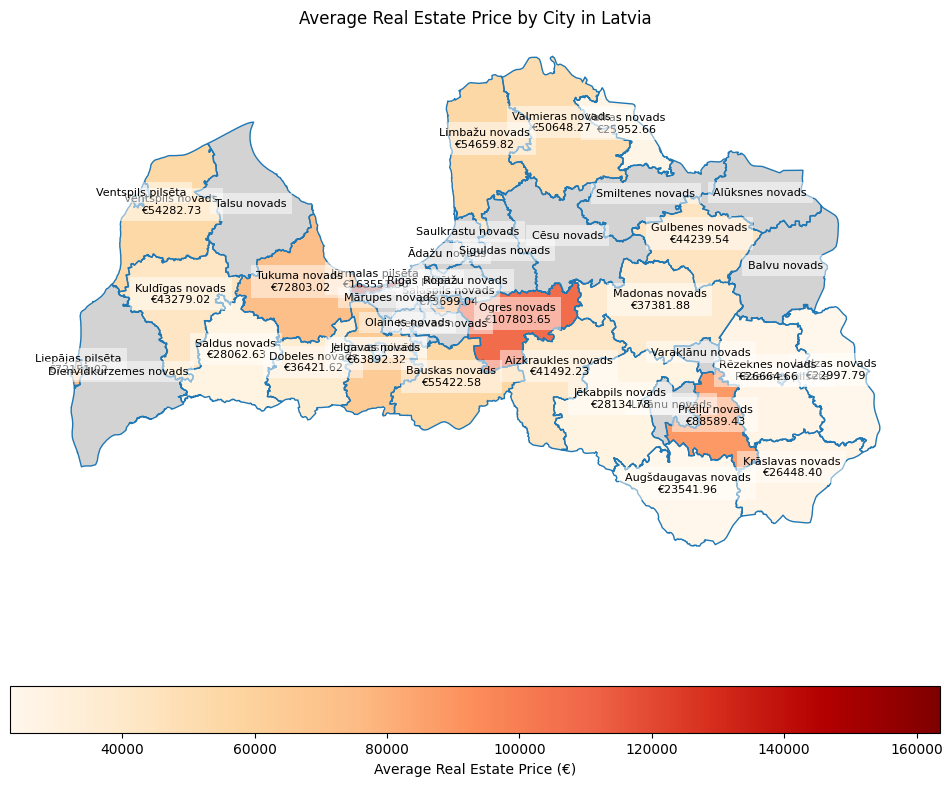

In [ ]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from rapidfuzz import process, fuzz  # Use rapidfuzz for fuzzy matching

# Load the dataset
file_path = '/content/sample_data.csv'  # Update this path as needed
data = pd.read_csv(file_path)

# Clean the dataset
data_cleaned = data.dropna(subset=['ad_city', 'price', 'latitude', 'longitude'])
data_cleaned = data_cleaned.drop_duplicates()
data_cleaned['price'] = pd.to_numeric(data_cleaned['price'], errors='coerce')

# Load GeoJSON data
geojson_path = '/content/lv.json'  # Update this path as needed
gdf = gpd.read_file(geojson_path)

# Fuzzy matching function to map ad_city to name in geojson
def match_city(ad_city, choices):
    match = process.extractOne(ad_city, choices, scorer=fuzz.token_sort_ratio)
    return match[0] if match else None

# Apply fuzzy matching for city names
gdf_names = gdf['name'].unique()
data_cleaned['matched_city'] = data_cleaned['ad_city'].apply(lambda x: match_city(x, gdf_names))

# Clean the matched city names by removing '-and-reg'
data_cleaned['matched_city_cleaned'] = data_cleaned['matched_city'].str.replace('-and-reg', '', regex=True).str.strip()

# Calculate the average price per matched city
avg_price_city = data_cleaned.groupby('matched_city_cleaned')['price'].mean().reset_index()
avg_price_city.columns = ['city', 'avg_price']

# Merge the average prices with geographical data by city
gdf = gdf.merge(avg_price_city, left_on='name', right_on='city', how='left')

# Check the merged DataFrame to confirm the data merge
print(gdf[['name', 'avg_price']])

# Calculate centroids **before** re-projecting to avoid any issues
gdf['centroid'] = gdf.geometry.centroid

# Re-project the geometries to a projected CRS (for example, UTM)
gdf = gdf.to_crs(epsg=3857)

# Plotting the map
fig, ax = plt.subplots(1, 1, figsize=(12, 10))
gdf.boundary.plot(ax=ax, linewidth=1)
gdf.plot(column='avg_price', ax=ax, legend=True,
         legend_kwds={'label': "Average Real Estate Price (€)",
                      'orientation': "horizontal"},
         cmap='OrRd', missing_kwds={"color": "lightgrey", "label": "No data"})

# Annotate city names and average prices on the map
for x, y, label, price in zip(gdf.centroid.x, gdf.centroid.y, gdf['name'], gdf['avg_price']):
    ax.annotate(f"{label}\n€{price:.2f}" if pd.notna(price) else label,
                xy=(x, y),
                horizontalalignment='center',
                fontsize=8,
                color='black',
                bbox=dict(facecolor='white', alpha=0.5, edgecolor='none'))

plt.title('Average Real Estate Price by City in Latvia')
plt.axis('off')
plt.show()


In [ ]:
!pip install rapidfuzz


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 27.5 MB/s eta 0:00:00


                      name      avg_price
0          Alūksnes novads            NaN
1            Līvānu novads            NaN
2          Gulbenes novads   44239.538462
3         Ventspils novads   54282.733607
4            Valkas novads   25952.656250
5         Salaspils novads   73699.044118
6         Jelgavas pilsēta            NaN
7         Rēzeknes pilsēta            NaN
8         Jūrmalas pilsēta  163551.497099
9        Ventspils pilsēta            NaN
10           Rīgas pilsēta            NaN
11        Liepājas pilsēta   72151.023411
12  Dienvidkurzemes novads            NaN
13         Kuldīgas novads   43279.021277
14           Saldus novads   28062.627119
15            Talsu novads            NaN
16           Tukuma novads   72803.021505
17          Dobeles novads   36421.620690
18         Jelgavas novads   63892.318898
19          Mārupes novads            NaN
20          Bauskas novads   55422.582278
21            Ogres novads  107803.646214
22      Aizkraukles novads   41492

<ipython-input-49-baa14eddd3ca>:88: UserWarning:

Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.




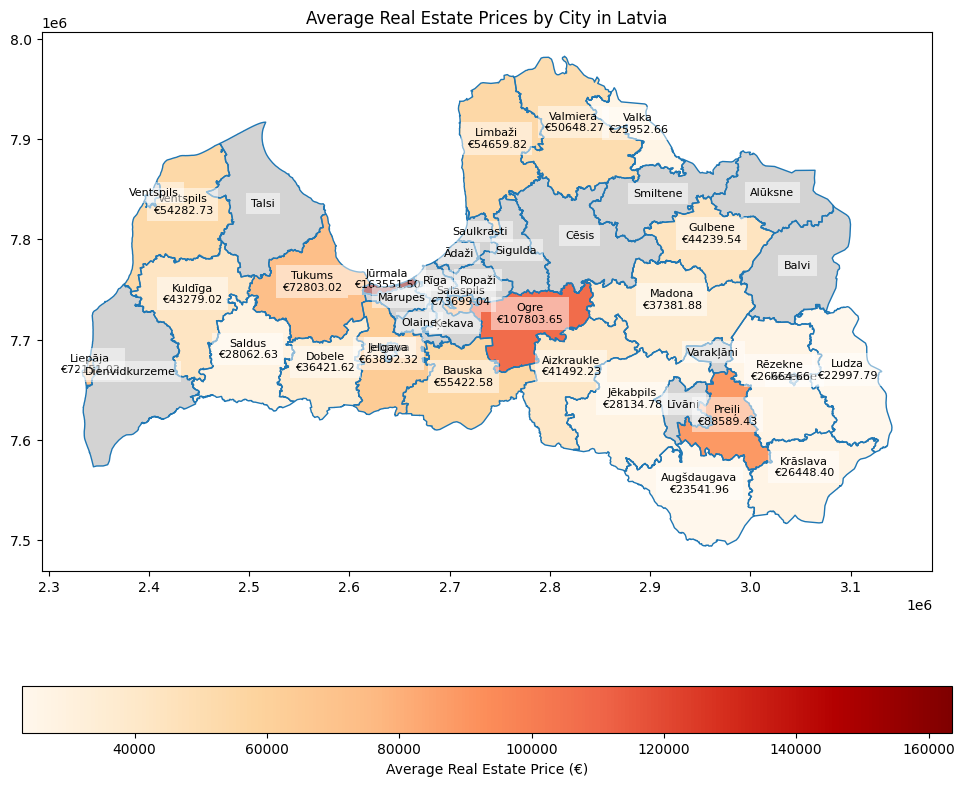

In [ ]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from rapidfuzz import process, fuzz  # Use rapidfuzz for fuzzy matching

# Load the dataset
file_path = '/content/sample_data.csv'  # Update this path as needed
data = pd.read_csv(file_path)

# Clean the dataset
data_cleaned = data.dropna(subset=['ad_city', 'price', 'latitude', 'longitude'])
data_cleaned = data_cleaned.drop_duplicates()
data_cleaned['price'] = pd.to_numeric(data_cleaned['price'], errors='coerce')

# Load GeoJSON data
geojson_path = '/content/lv.json'  # Update this path as needed
gdf = gpd.read_file(geojson_path)

# Fuzzy matching function to map ad_city to name in geojson
def match_city(ad_city, choices):
    match = process.extractOne(ad_city, choices, scorer=fuzz.token_sort_ratio)
    return match[0] if match else None

# Apply fuzzy matching for city names
gdf_names = gdf['name'].unique()
data_cleaned['matched_city'] = data_cleaned['ad_city'].apply(lambda x: match_city(x, gdf_names))

# Clean the matched city names by removing '-and-reg'
data_cleaned['matched_city_cleaned'] = data_cleaned['matched_city'].str.replace('-and-reg', '', regex=True).str.strip()

# Calculate the average price per matched city
avg_price_city = data_cleaned.groupby('matched_city_cleaned')['price'].mean().reset_index()
avg_price_city.columns = ['city', 'avg_price']

# Merge the average prices with geographical data by city
gdf = gdf.merge(avg_price_city, left_on='name', right_on='city', how='left')

# Check the merged DataFrame to confirm the data merge
print(gdf[['name', 'avg_price']])

# Define abbreviation mapping
abbreviation_mapping = {
    'Alūksnes novads': 'Alūksne',
    'Līvānu novads': 'Līvāni',
    'Gulbenes novads': 'Gulbene',
    'Ventspils novads': 'Ventspils',
    'Valkas novads': 'Valka',
    'Salaspils novads': 'Salaspils',
    'Jelgavas pilsēta': 'Jelgava',
    'Rēzeknes pilsēta': 'Rēzekne',
    'Jūrmalas pilsēta': 'Jūrmala',
    'Ventspils pilsēta': 'Ventspils',
    'Rīgas pilsēta': 'Rīga',
    'Liepājas pilsēta': 'Liepāja',
    'Dienvidkurzemes novads': 'Dienvidkurzeme',
    'Kuldīgas novads': 'Kuldīga',
    'Saldus novads': 'Saldus',
    'Talsu novads': 'Talsi',
    'Tukuma novads': 'Tukums',
    'Dobeles novads': 'Dobele',
    'Jelgavas novads': 'Jelgava',
    'Mārupes novads': 'Mārupes',
    'Bauskas novads': 'Bauska',
    'Ogres novads': 'Ogre',
    'Aizkraukles novads': 'Aizkraukle',
    'Jēkabpils novads': 'Jēkabpils',
    'Ludzas novads': 'Ludza',
    'Rēzeknes novads': 'Rēzekne',
    'Balvu novads': 'Balvi',
    'Madonas novads': 'Madona',
    'Smiltenes novads': 'Smiltene',
    'Cēsu novads': 'Cēsis',
    'Valmieras novads': 'Valmiera',
    'Ādažu novads': 'Ādaži',
    'Ropažu novads': 'Ropaži',
    'Siguldas novads': 'Sigulda',
    'Preiļu novads': 'Preiļi',
    'Krāslavas novads': 'Krāslava',
    'Ķekavas novads': 'Ķekava',
    'Olaines novads': 'Olaine',
    'Saulkrastu novads': 'Saulkrasti',
    'Limbažu novads': 'Limbaži',
    'Augšdaugavas novads': 'Augšdaugava',
    'Varakļānu novads': 'Varakļāni'
}

# Calculate centroids before re-projecting to avoid any issues
gdf['centroid'] = gdf.geometry.centroid

# Re-project the geometries to a projected CRS (for example, UTM)
gdf = gdf.to_crs(epsg=3857)

# Plotting the map
fig, ax = plt.subplots(1, 1, figsize=(12, 10))
gdf.boundary.plot(ax=ax, linewidth=1)
gdf.plot(column='avg_price', ax=ax, legend=True,
         legend_kwds={'label': "Average Real Estate Price (€)",
                      'orientation': "horizontal"},
         cmap='OrRd', missing_kwds={"color": "lightgrey", "label": "No data"})

# Annotate city names and average prices on the map using abbreviations
for x, y, name, price in zip(gdf.centroid.x, gdf.centroid.y, gdf['name'], gdf['avg_price']):
    # Use abbreviation mapping to get the abbreviated name
    abbreviated_name = abbreviation_mapping.get(name, name)  # Fallback to full name if no abbreviation found
    ax.annotate(f"{abbreviated_name}\n€{price:.2f}" if pd.notna(price) else abbreviated_name,
                xy=(x, y),
                horizontalalignment='center',
                fontsize=8,
                color='black',
                bbox=dict(facecolor='white', alpha=0.5, edgecolor='none'))

# Show the plot
plt.title('Average Real Estate Prices by City in Latvia')
plt.show()


<ipython-input-54-88bd6be936d1>:84: UserWarning:

Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.




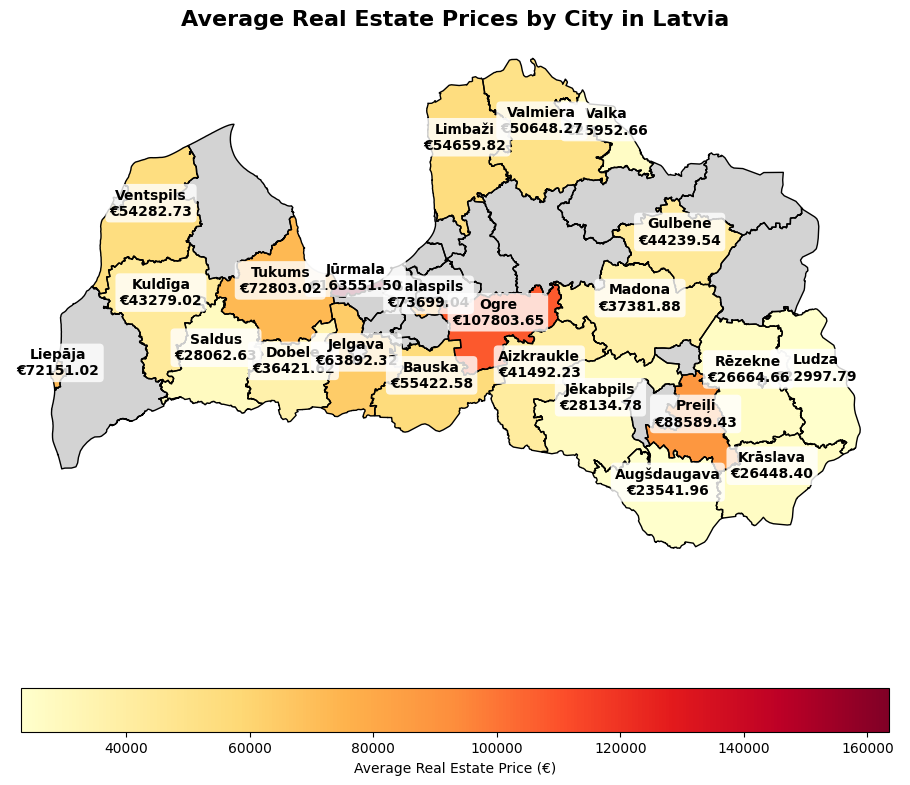

In [ ]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from rapidfuzz import process, fuzz

# Load the dataset
file_path = '/content/sample_data.csv'  # Update this path as needed
data = pd.read_csv(file_path)

# Clean the dataset
data_cleaned = data.dropna(subset=['ad_city', 'price', 'latitude', 'longitude'])
data_cleaned = data_cleaned.drop_duplicates()
data_cleaned['price'] = pd.to_numeric(data_cleaned['price'], errors='coerce')

# Load GeoJSON data
geojson_path = '/content/lv.json'  # Update this path as needed
gdf = gpd.read_file(geojson_path)

# Fuzzy matching function to map ad_city to name in geojson
def match_city(ad_city, choices):
    match = process.extractOne(ad_city, choices, scorer=fuzz.token_sort_ratio)
    return match[0] if match else None

# Apply fuzzy matching for city names
gdf_names = gdf['name'].unique()
data_cleaned['matched_city'] = data_cleaned['ad_city'].apply(lambda x: match_city(x, gdf_names))

# Clean the matched city names
data_cleaned['matched_city_cleaned'] = data_cleaned['matched_city'].str.replace('-and-reg', '', regex=True).str.strip()

# Calculate the average price per matched city
avg_price_city = data_cleaned.groupby('matched_city_cleaned')['price'].mean().reset_index()
avg_price_city.columns = ['city', 'avg_price']

# Merge the average prices with geographical data
gdf = gdf.merge(avg_price_city, left_on='name', right_on='city', how='left')

# Define abbreviation mapping
abbreviation_mapping = {
    'Alūksnes novads': 'Alūksne',
    'Līvānu novads': 'Līvāni',
    'Gulbenes novads': 'Gulbene',
    'Ventspils novads': 'Ventspils',
    'Valkas novads': 'Valka',
    'Salaspils novads': 'Salaspils',
    'Jelgavas pilsēta': 'Jelgava',
    'Rēzeknes pilsēta': 'Rēzekne',
    'Jūrmalas pilsēta': 'Jūrmala',
    'Rīgas pilsēta': 'Rīga',
    'Liepājas pilsēta': 'Liepāja',
    'Dienvidkurzemes novads': 'Dienvidkurzeme',
    'Kuldīgas novads': 'Kuldīga',
    'Saldus novads': 'Saldus',
    'Talsu novads': 'Talsi',
    'Tukuma novads': 'Tukums',
    'Dobeles novads': 'Dobele',
    'Jelgavas novads': 'Jelgava',
    'Mārupes novads': 'Mārupes',
    'Bauskas novads': 'Bauska',
    'Ogres novads': 'Ogre',
    'Aizkraukles novads': 'Aizkraukle',
    'Jēkabpils novads': 'Jēkabpils',
    'Ludzas novads': 'Ludza',
    'Rēzeknes novads': 'Rēzekne',
    'Balvu novads': 'Balvi',
    'Madonas novads': 'Madona',
    'Smiltenes novads': 'Smiltene',
    'Cēsu novads': 'Cēsis',
    'Valmieras novads': 'Valmiera',
    'Ādažu novads': 'Ādaži',
    'Ropažu novads': 'Ropaži',
    'Siguldas novads': 'Sigulda',
    'Preiļu novads': 'Preiļi',
    'Krāslavas novads': 'Krāslava',
    'Ķekavas novads': 'Ķekava',
    'Olaines novads': 'Olaine',
    'Saulkrastu novads': 'Saulkrasti',
    'Limbažu novads': 'Limbaži',
    'Augšdaugavas novads': 'Augšdaugava',
    'Varakļānu novads': 'Varakļāni'
}

# Calculate centroids before re-projecting
gdf['centroid'] = gdf.geometry.centroid

# Re-project the geometries to a projected CRS
gdf = gdf.to_crs(epsg=3857)

# Plotting the map
fig, ax = plt.subplots(1, 1, figsize=(14, 10))
gdf.boundary.plot(ax=ax, linewidth=1, color='black')
gdf.plot(column='avg_price', ax=ax, legend=True,
         legend_kwds={'label': "Average Real Estate Price (€)",
                      'orientation': "horizontal", 'shrink': 0.8},
         cmap='YlOrRd', missing_kwds={"color": "lightgrey", "label": "No data"})

for x, y, name, price in zip(gdf.centroid.x, gdf.centroid.y, gdf['name'], gdf['avg_price']):
    abbreviated_name = abbreviation_mapping.get(name, "Nann")  # Fallback to "Nann"
    if pd.notna(price):  # Only annotate if price is not NaN
        ax.annotate(
            f"{abbreviated_name}\n€{price:.2f}",
            xy=(x, y),
            horizontalalignment='center',
            fontsize=10,
            fontweight='bold',
            color='black',
            bbox=dict(facecolor='white', alpha=0.8, edgecolor='none', boxstyle='round,pad=0.3')
        )

# Set title with a larger font size
plt.title('Average Real Estate Prices by City in Latvia', fontsize=16, fontweight='bold')
plt.grid(False)
plt.axis('off')  # Turn off the axis

# Show the plot
plt.show()


<ipython-input-53-b1114a9271ec>:84: UserWarning:

Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.




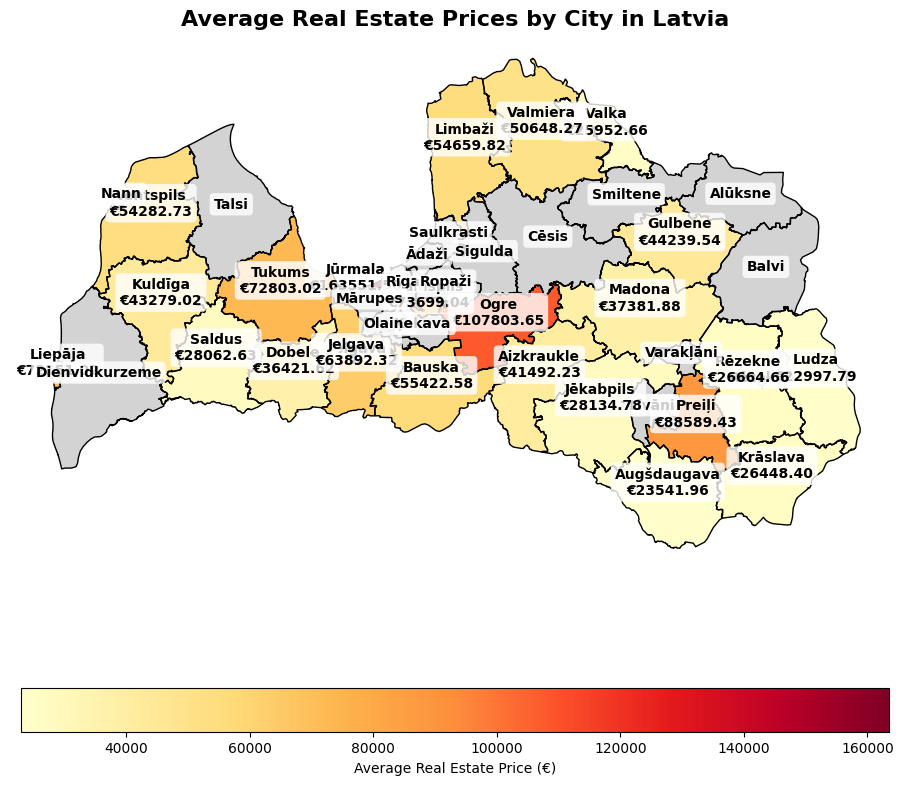

In [ ]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from rapidfuzz import process, fuzz

# Load the dataset
file_path = '/content/sample_data.csv'  # Update this path as needed
data = pd.read_csv(file_path)

# Clean the dataset
data_cleaned = data.dropna(subset=['ad_city', 'price', 'latitude', 'longitude'])
data_cleaned = data_cleaned.drop_duplicates()
data_cleaned['price'] = pd.to_numeric(data_cleaned['price'], errors='coerce')

# Load GeoJSON data
geojson_path = '/content/lv.json'  # Update this path as needed
gdf = gpd.read_file(geojson_path)

# Fuzzy matching function to map ad_city to name in geojson
def match_city(ad_city, choices):
    match = process.extractOne(ad_city, choices, scorer=fuzz.token_sort_ratio)
    return match[0] if match else None

# Apply fuzzy matching for city names
gdf_names = gdf['name'].unique()
data_cleaned['matched_city'] = data_cleaned['ad_city'].apply(lambda x: match_city(x, gdf_names))

# Clean the matched city names
data_cleaned['matched_city_cleaned'] = data_cleaned['matched_city'].str.replace('-and-reg', '', regex=True).str.strip()

# Calculate the average price per matched city
avg_price_city = data_cleaned.groupby('matched_city_cleaned')['price'].mean().reset_index()
avg_price_city.columns = ['city', 'avg_price']

# Merge the average prices with geographical data
gdf = gdf.merge(avg_price_city, left_on='name', right_on='city', how='left')

# Define abbreviation mapping
abbreviation_mapping = {
    'Alūksnes novads': 'Alūksne',
    'Līvānu novads': 'Līvāni',
    'Gulbenes novads': 'Gulbene',
    'Ventspils novads': 'Ventspils',
    'Valkas novads': 'Valka',
    'Salaspils novads': 'Salaspils',
    'Jelgavas pilsēta': 'Jelgava',
    'Rēzeknes pilsēta': 'Rēzekne',
    'Jūrmalas pilsēta': 'Jūrmala',
    'Rīgas pilsēta': 'Rīga',
    'Liepājas pilsēta': 'Liepāja',
    'Dienvidkurzemes novads': 'Dienvidkurzeme',
    'Kuldīgas novads': 'Kuldīga',
    'Saldus novads': 'Saldus',
    'Talsu novads': 'Talsi',
    'Tukuma novads': 'Tukums',
    'Dobeles novads': 'Dobele',
    'Jelgavas novads': 'Jelgava',
    'Mārupes novads': 'Mārupes',
    'Bauskas novads': 'Bauska',
    'Ogres novads': 'Ogre',
    'Aizkraukles novads': 'Aizkraukle',
    'Jēkabpils novads': 'Jēkabpils',
    'Ludzas novads': 'Ludza',
    'Rēzeknes novads': 'Rēzekne',
    'Balvu novads': 'Balvi',
    'Madonas novads': 'Madona',
    'Smiltenes novads': 'Smiltene',
    'Cēsu novads': 'Cēsis',
    'Valmieras novads': 'Valmiera',
    'Ādažu novads': 'Ādaži',
    'Ropažu novads': 'Ropaži',
    'Siguldas novads': 'Sigulda',
    'Preiļu novads': 'Preiļi',
    'Krāslavas novads': 'Krāslava',
    'Ķekavas novads': 'Ķekava',
    'Olaines novads': 'Olaine',
    'Saulkrastu novads': 'Saulkrasti',
    'Limbažu novads': 'Limbaži',
    'Augšdaugavas novads': 'Augšdaugava',
    'Varakļānu novads': 'Varakļāni'
}

# Calculate centroids before re-projecting
gdf['centroid'] = gdf.geometry.centroid

# Re-project the geometries to a projected CRS
gdf = gdf.to_crs(epsg=3857)

# Plotting the map
fig, ax = plt.subplots(1, 1, figsize=(14, 10))
gdf.boundary.plot(ax=ax, linewidth=1, color='black')
gdf.plot(column='avg_price', ax=ax, legend=True,
         legend_kwds={'label': "Average Real Estate Price (€)",
                      'orientation': "horizontal", 'shrink': 0.8},
         cmap='YlOrRd', missing_kwds={"color": "lightgrey", "label": "No data"})

# Annotate city names and average prices on the map using abbreviations
for x, y, name, price in zip(gdf.centroid.x, gdf.centroid.y, gdf['name'], gdf['avg_price']):
    abbreviated_name = abbreviation_mapping.get(name, "Nann")  # Fallback to "Nann"
    ax.annotate(
        f"{abbreviated_name}\n€{price:.2f}" if pd.notna(price) else abbreviated_name,
        xy=(x, y),
        horizontalalignment='center',
        fontsize=10,
        fontweight='bold',
        color='black',
        bbox=dict(facecolor='white', alpha=0.8, edgecolor='none', boxstyle='round,pad=0.3')
    )

# Set title with a larger font size
plt.title('Average Real Estate Prices by City in Latvia', fontsize=16, fontweight='bold')
plt.grid(False)
plt.axis('off')  # Turn off the axis

# Show the plot
plt.show()
